# Tratamentos dos dados, Importes etc


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle, time

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier 
%tensorflow_version 2.x

%matplotlib inline

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
Ann_acuracia = None
Ann_tempo = None

Ann_tempo_regiao = None
Ann_acuracia_regiao = None

# ---------------------------

SVM_linear_acuracia = None
SVM_linear_tempo = None

# -------
SVM_rbf_acuracia = None
SVM_rbf_tempo = None

SVM_rbf_tempo_regiao = None
SVM_rbf_acuracia_regiao  = None
# -------

SVM_sigmoid_acuracia = None
SVM_sigmoid_tempo = None

# ---------------------------

rdam_acuracia = None
rdam_tempo = None

rdam_tempo_regiao = None
rdam_acuracia_regiao = None

## Carregamento dos conjuntos de dados

In [0]:
data = pd.read_csv('./Base/Base_Completa.csv', encoding = 'iso-8859-1', sep=';',  low_memory=False)
data.shape
data = data[data.TAXA_PARTICIPACAO_5EF!=0]
data.shape

(47771, 258)

In [0]:
def pega_data(df, tipe, rotulo):
  q1 = df[tipe].quantile(q=0.25)
  q4 = df[tipe].quantile(q=0.75)
  
  df1Q = df[df[tipe]<q1]
  df4Q = df[df[tipe]>q4]

  #print(df1Q, df4Q)
  
  df1Q.loc[:,rotulo] = 0
  df4Q.loc[:,rotulo] = 1
  
  return  pd.concat([df4Q , df1Q])

In [0]:
#atributo abaixo base lp q n é lp, mas sim da media total do 5 ano, n mudei o nome pq tinha q renomear o restante
base_LP = pega_data(data, 'MEDIA_TOTAL_5EF', 'ROTULO')
#base_LP = pega_data(data, 'MEDIA_5EF_LP', 'ROTULO')
#base_MT = pega_data(data, 'MEDIA_5EF_MT', 'ROTULO')
base_LP_MT = pega_data(data, 'MEDIA_TOTAL_5EF', 'ROTULO')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Atributos


In [0]:
atributos_ = ["TAXA_PARTICIPACAO_5EF", "TP_DEPENDENCIA", "IN_AGUA_INEXISTENTE", "IN_ENERGIA_INEXISTENTE", "IN_ESGOTO_INEXISTENTE","IN_LABORATORIO_INFORMATICA", "IN_LABORATORIO_CIENCIAS", "IN_QUADRA_ESPORTES", "IN_BIBLIOTECA_SALA_LEITURA", "IN_PATIO_COBERTO", "IN_SALA_DIRETORIA", "IN_SALA_PROFESSOR", "IN_AUDITORIO", "IN_DEPENDENCIAS_PNE", "IN_EQUIP_TV","IN_EQUIP_COPIADORA", "IN_EQUIP_RETROPROJETOR", "IN_EQUIP_IMPRESSORA", "IN_EQUIP_SOM", "IN_COMPUTADOR", "IN_INTERNET", "CO_UF", "CO_REGIAO"]

atributos = ['IN_AGUA_FILTRADA','IN_AGUA_REDE_PUBLICA','IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA'
,'IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR'
,'IN_ENERGIA_OUTROS','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA'
,'IN_ESGOTO_INEXISTENTE','IN_LIXO_COLETA_PERIODICA','IN_LIXO_QUEIMA'
,'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_RECICLA','IN_LIXO_ENTERRA','IN_LIXO_OUTROS'
,'IN_SALA_DIRETORIA','IN_SALA_PROFESSOR','IN_LABORATORIO_INFORMATICA'
,'IN_LABORATORIO_CIENCIAS','IN_SALA_ATENDIMENTO_ESPECIAL','IN_QUADRA_ESPORTES_COBERTA'
,'IN_QUADRA_ESPORTES_DESCOBERTA','IN_QUADRA_ESPORTES','IN_COZINHA','IN_BIBLIOTECA'
,'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA','IN_PARQUE_INFANTIL','IN_BERCARIO'
,'IN_BANHEIRO_FORA_PREDIO','IN_BANHEIRO_DENTRO_PREDIO','IN_BANHEIRO_EI','IN_BANHEIRO_PNE'
,'IN_DEPENDENCIAS_PNE','IN_SECRETARIA','IN_BANHEIRO_CHUVEIRO','IN_REFEITORIO','IN_DESPENSA'
,'IN_ALMOXARIFADO','IN_AUDITORIO','IN_PATIO_COBERTO','IN_PATIO_DESCOBERTO'
,'IN_ALOJAM_ALUNO','IN_ALOJAM_PROFESSOR','IN_AREA_VERDE','IN_LAVANDERIA'
,'IN_DEPENDENCIAS_OUTRAS','QT_SALAS_EXISTENTES','QT_SALAS_UTILIZADAS'
,'IN_EQUIP_TV','IN_EQUIP_VIDEOCASSETE','IN_EQUIP_DVD','IN_EQUIP_PARABOLICA'
,'IN_EQUIP_COPIADORA','IN_EQUIP_RETROPROJETOR'
,'IN_EQUIP_IMPRESSORA','IN_EQUIP_IMPRESSORA_MULT'
,'IN_EQUIP_SOM','IN_EQUIP_MULTIMIDIA','IN_EQUIP_FAX','IN_EQUIP_FOTO'
,'IN_COMPUTADOR','QT_EQUIP_TV','QT_EQUIP_VIDEOCASSETE','QT_EQUIP_DVD','QT_EQUIP_PARABOLICA'
,'QT_EQUIP_COPIADORA','QT_EQUIP_RETROPROJETOR'
,'QT_EQUIP_IMPRESSORA','QT_EQUIP_IMPRESSORA_MULT','QT_EQUIP_SOM'
,'QT_EQUIP_MULTIMIDIA','QT_EQUIP_FAX','QT_EQUIP_FOTO','QT_COMPUTADOR'
,'QT_COMP_ALUNO','IN_INTERNET','IN_BANDA_LARGA','QT_FUNCIONARIOS'
,'IN_ALIMENTACAO','TP_AEE','TP_ATIVIDADE_COMPLEMENTAR','IN_FUNDAMENTAL_CICLOS'
,'TP_LOCALIZACAO_DIFERENCIADA','IN_MATERIAL_ESP_QUILOMBOLA'
,'IN_MATERIAL_ESP_INDIGENA','IN_MATERIAL_ESP_NAO_UTILIZA','IN_EDUCACAO_INDIGENA'
,'TP_INDIGENA_LINGUA','CO_LINGUA_INDIGENA','IN_BRASIL_ALFABETIZADO','IN_FINAL_SEMANA'
,'IN_FORMACAO_ALTERNANCIA','IN_MEDIACAO_PRESENCIAL','IN_MEDIACAO_SEMIPRESENCIAL'
,'IN_MEDIACAO_EAD','IN_ESPECIAL_EXCLUSIVA','IN_REGULAR'
,'IN_EJA','IN_PROFISSIONALIZANTE','IN_COMUM_CRECHE','IN_COMUM_PRE','IN_COMUM_FUND_AI'
,'IN_COMUM_FUND_AF','IN_COMUM_MEDIO_MEDIO','IN_COMUM_MEDIO_INTEGRADO'
,'IN_COMUM_MEDIO_NORMAL','IN_ESP_EXCLUSIVA_CRECHE','IN_ESP_EXCLUSIVA_PRE',
'IN_ESP_EXCLUSIVA_FUND_AI','IN_ESP_EXCLUSIVA_FUND_AF','IN_ESP_EXCLUSIVA_MEDIO_MEDIO'
,'IN_ESP_EXCLUSIVA_MEDIO_INTEGR','IN_ESP_EXCLUSIVA_MEDIO_NORMAL','IN_COMUM_EJA_FUND',
'IN_COMUM_EJA_MEDIO','IN_COMUM_EJA_PROF','IN_ESP_EXCLUSIVA_EJA_FUND'
,'IN_ESP_EXCLUSIVA_EJA_MEDIO','IN_ESP_EXCLUSIVA_EJA_PROF',
'IN_COMUM_PROF','IN_ESP_EXCLUSIVA_PROF', "CO_REGIAO" ]

len(atributos)

127

# ANN

## Ann com codigo de Regiao

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 23)                552       
_________________________________________________________________
dense_26 (Dense)             (None, 15)                360       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________
Train on 16713 samples, validate on 7164 samples
Epoch 1/9
16713/16713 [==============================] - 28s 2ms/step - loss: 0.4487 - acc: 0.8348 - val_loss: 0.3929 - val_acc: 0.8611
Epoch 2/9
16713/16713 [==============================] - 28s 2ms/

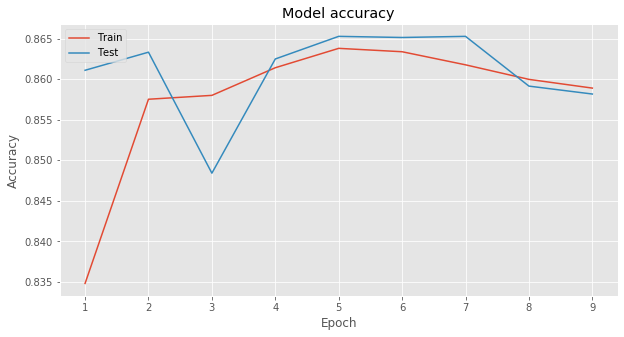

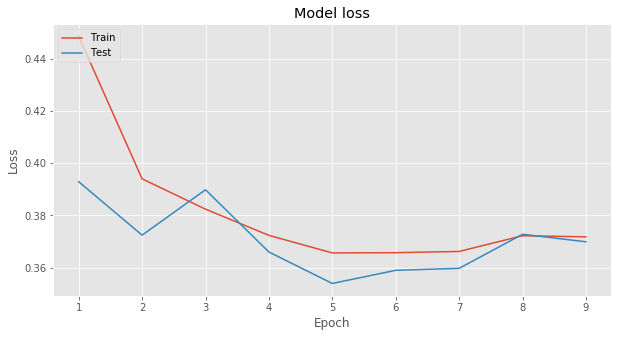

In [0]:
X = base_LP.loc[:, atributos_ ]
y = base_LP.loc[:,'ROTULO'].values

X_train_ann_regiao, X_test_ann_regiao, y_train_ann_regiao, y_test_ann_regiao = train_test_split(X, y, test_size = 0.3, random_state = 1)

def crear_model(opt):
  model = Sequential()
  model.add(Dense(units = len(X.columns), kernel_initializer = 'uniform', activation = 'relu', input_dim = len(X.columns)))
  model.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu')) #10
  model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax')) #5
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # softmax sigmoid
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model
  
  
modelo = crear_model('adam')
modelo.summary()

start = time.time ()

arg_epochs = 9
# Treina o modelo
history = modelo.fit(X_train_ann_regiao, y_train_ann_regiao, epochs=arg_epochs, batch_size=1, validation_data=(X_test_ann_regiao, y_test_ann_regiao))

print("[INFO] ANN...\n")
y_pred = modelo.predict(X_test_ann_regiao, batch_size=1)
y_predic =(y_pred>0.5)

print(confusion_matrix(y_test_ann_regiao, y_predic))
print(classification_report(y_test_ann_regiao, y_predic, target_names=['Infraestrutura prejudicial', 'Infraestrutura nao prejudicial']))

end = time.time ()
Ann_tempo_regiao = end-start
print(Ann_tempo_regiao)

scores = modelo.evaluate(X_train_ann_regiao, y_train_ann_regiao, verbose=0)
Ann_acuracia_regiao = (scores[1]*100)


#from keras.utils import plot_model
#plot_model(modelo, to_file='modelo.png')

modelo.save('ANN_Regiao.model')
modelo.save_weights('ANN_Regiao.weights')


epochs = range(1, len(history.history['loss']) + 1)

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
# Plot training & validation accuracy values
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
# Plot training & validation loss values
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Ann Sem codigo de Regiao


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 21)                462       
_________________________________________________________________
dense_30 (Dense)             (None, 15)                330       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 963
Trainable params: 963
Non-trainable params: 0
_________________________________________________________________
Train on 16713 samples, validate on 7164 samples
Epoch 1/9
16713/16713 [==============================] - 29s 2ms/step - loss: 0.5268 - acc: 0.7634 - val_loss: 0.4806 - val_acc: 0.7881
Epoch 2/9
16713/16713 [==============================] - 28s 2ms/step

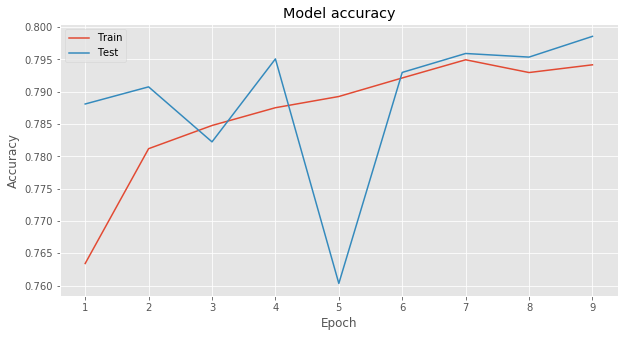

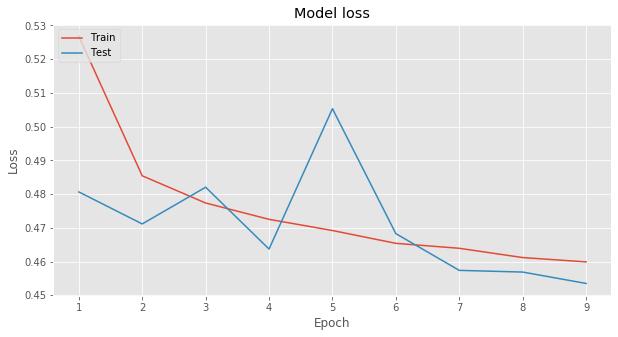

In [0]:
X_ann = base_LP.loc[:, atributos_[:-2] ]
y_ann = base_LP.loc[:,'ROTULO'].values

X_trainy_train_ann, X_test_train_ann, y_train_train_ann, y_test_train_ann = train_test_split(X_ann, y_ann, test_size = 0.3, random_state = 1)

def crear_model(opt):
  model = Sequential()
  model.add(Dense(units = len(X_ann.columns), kernel_initializer = 'uniform', activation = 'relu', input_dim = len(X_ann.columns)))
  model.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu')) #10
  model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax')) #5
  model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # softmax sigmoid
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

modelo = crear_model('adam')
modelo.summary()

start = time.time ()

arg_epochs = 9
# Treina o modelo
history = modelo.fit(X_trainy_train_ann, y_train_train_ann, epochs=arg_epochs, batch_size=1, validation_data=(X_test_train_ann, y_test_train_ann))

from sklearn.metrics import classification_report, confusion_matrix
print("[INFO] ANN...\n")
y_pred = modelo.predict(X_test_train_ann, batch_size=1)
y_predic =(y_pred>0.5)

print(confusion_matrix(y_test_train_ann, y_predic))
print(classification_report(y_test_train_ann, y_predic, target_names=['Infraestrutura prejudicial', 'Infraestrutura nao prejudicial']))

end = time.time ()
Ann_tempo = end-start
print(Ann_tempo)

scores = modelo.evaluate(X_trainy_train_ann, y_train_train_ann, verbose=0)
Ann_acuracia = (scores[1]*100)


#from keras.utils import plot_model
#plot_model(modelo, to_file='modelo.png')

modelo.save('ANN.model')
modelo.save_weights('ANN.weights')


epochs = range(1, len(history.history['loss']) + 1)

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
# Plot training & validation accuracy values
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
# Plot training & validation loss values
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# SVM

In [0]:
X_svn = base_LP.loc[:, atributos_ ]
y_svn = base_LP.loc[:,'ROTULO'].values

X_train_regiao, X_test_regiao, y_train_regiao, y_test_regiao = train_test_split(X, y, test_size = 0.3, random_state = 1)

X_svn = base_LP.loc[:, atributos_[:-2] ]
y_svn = base_LP.loc[:,'ROTULO'].values

X_train, X_test, y_train, y_test = train_test_split(X_svn, y_svn, test_size = 0.3, random_state = 1)

## Kernel Linear

In [0]:
start = time.time ()

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_regiao, y_train_regiao)

y_pred = svclassifier.predict(X_test_regiao)

print("[INFO] SVC-linear ...\n")
print(confusion_matrix(y_test_regiao,y_pred))
print(classification_report(y_test_regiao,y_pred))

end = time.time()

SVM_linear_tempo = end-start
print(SVM_linear_tempo)

SVM_linear_acuracia = accuracy_score(y_test_regiao, y_pred) * 100

[INFO] SVC-linear ...

[[3135  368]
 [ 629 3032]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3503
           1       0.89      0.83      0.86      3661

    accuracy                           0.86      7164
   macro avg       0.86      0.86      0.86      7164
weighted avg       0.86      0.86      0.86      7164

34.632598638534546


## Kernel RBF


## Com Regiao

In [0]:
start = time.time ()

svclassifier = SVC(gamma='auto', kernel='rbf')
svclassifier.fit(X_train_regiao, y_train_regiao)

y_pred = svclassifier.predict(X_test_regiao)

print("[INFO] SVC-rbf ...\n")
print(confusion_matrix(y_test_regiao, y_pred))
print(classification_report(y_test_regiao, y_pred))

end = time.time ()

SVM_rbf_tempo_regiao = end-start
print(SVM_rbf_tempo_regiao)

SVM_rbf_acuracia_regiao = accuracy_score(y_test_regiao, y_pred) * 100

[INFO] SVC-rbf ...

[[3168  335]
 [ 488 3173]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3503
           1       0.90      0.87      0.89      3661

    accuracy                           0.89      7164
   macro avg       0.89      0.89      0.89      7164
weighted avg       0.89      0.89      0.89      7164

10.73669719696045


## Sem Regiao

In [0]:
start = time.time ()

svclassifier = SVC(gamma='auto', kernel='rbf')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print("[INFO] SVC-rbf ...\n")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

end = time.time ()

SVM_rbf_tempo = end-start
print(SVM_rbf_tempo)

SVM_rbf_acuracia = accuracy_score(y_test, y_pred) * 100

[INFO] SVC-rbf ...

[[2726  777]
 [ 671 2990]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3503
           1       0.79      0.82      0.81      3661

    accuracy                           0.80      7164
   macro avg       0.80      0.80      0.80      7164
weighted avg       0.80      0.80      0.80      7164

15.21896743774414


## Kernel sigmoid


In [0]:
start = time.time ()

svclassifier = SVC(gamma='auto', kernel='sigmoid')
svclassifier.fit(X_train_regiao, y_train_regiao)

y_pred = svclassifier.predict(X_test_regiao)

print("[INFO] SVC-sigmoid ...\n")
print(confusion_matrix(y_test_regiao, y_pred))
print(classification_report(y_test_regiao, y_pred))

end = time.time ()
SVM_sigmoid_tempo = end-start
print(SVM_sigmoid_tempo)

SVM_sigmoid_acuracia  = accuracy_score(y_test_regiao, y_pred) * 100

[INFO] SVC-sigmoid ...

[[ 622 2881]
 [ 162 3499]]
              precision    recall  f1-score   support

           0       0.79      0.18      0.29      3503
           1       0.55      0.96      0.70      3661

    accuracy                           0.58      7164
   macro avg       0.67      0.57      0.49      7164
weighted avg       0.67      0.58      0.50      7164

21.060149908065796


# Random Forest

## Sem codigo da regiao

In [0]:
X_rdF = base_LP.loc[:, atributos_[:-2] ]
y_rdF = base_LP.loc[:,'ROTULO'].values

X_trainy_rdF, X_testy_rdF, y_trainy_rdF, y_test_rdF = train_test_split(X_rdF, y_rdF, test_size = 0.30, random_state = 0)

start = time.time ()

model = RandomForestClassifier(n_estimators=100, max_depth=6)
model.fit(X_trainy_rdF, y_trainy_rdF)

y_pred = model.predict(X_testy_rdF)

print("[INFO] RandomForestClassifier ...\n")

print(confusion_matrix(y_test_rdF, y_pred))
print(classification_report(y_test_rdF, y_pred))

end = time.time ()
rdam_tempo = end-start
print (rdam_tempo)

# ver acurácia geral
rdam_acuracia = accuracy_score(y_test_rdF, y_pred)*100

[INFO] RandomForestClassifier ...

[[2801  739]
 [ 715 2909]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3540
           1       0.80      0.80      0.80      3624

    accuracy                           0.80      7164
   macro avg       0.80      0.80      0.80      7164
weighted avg       0.80      0.80      0.80      7164

0.6458117961883545


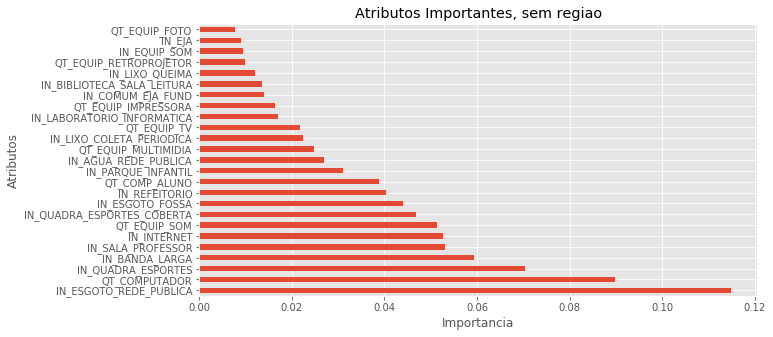

In [0]:
X = base_LP.loc[:, atributos[:-1] ]
y = base_LP.loc[:,'ROTULO'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

model = RandomForestClassifier(n_estimators=100, max_depth=6)

model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, X.columns)

plt.style.use("ggplot")
plt.figure(figsize=(10,5))

importances.nlargest(25).plot(kind='barh', title="Atributos Importantes, sem regiao" )

plt.xlabel('Importancia')
plt.ylabel('Atributos')
plt.show()

## Com codigo da Regiao

In [0]:
X_rdF_regiao = base_LP.loc[:, atributos_ ]
y_rdF_regiao = base_LP.loc[:,'ROTULO'].values

X_trainy_rdF_regiao, X_testy_rdF_regiao, y_trainy_rdF_regiao, y_testy_rdF_regiao = train_test_split(X_rdF, y_rdF, test_size = 0.30, random_state = 0)

start = time.time ()

model = RandomForestClassifier(n_estimators=100, max_depth=6)
model.fit(X_trainy_rdF_regiao, y_trainy_rdF_regiao)

y_pred = model.predict(X_testy_rdF_regiao)

print("[INFO] RandomForestClassifier ...\n")

print(confusion_matrix(y_testy_rdF_regiao, y_pred))
print(classification_report(y_testy_rdF_regiao, y_pred))

end = time.time ()
rdam_tempo_regiao = end-start
print (rdam_tempo_regiao)

# ver acurácia geral
rdam_acuracia_regiao = accuracy_score(y_test, y_pred)*100

[INFO] RandomForestClassifier ...

[[2775  765]
 [ 706 2918]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3540
           1       0.79      0.81      0.80      3624

    accuracy                           0.79      7164
   macro avg       0.79      0.79      0.79      7164
weighted avg       0.79      0.79      0.79      7164

0.6526961326599121


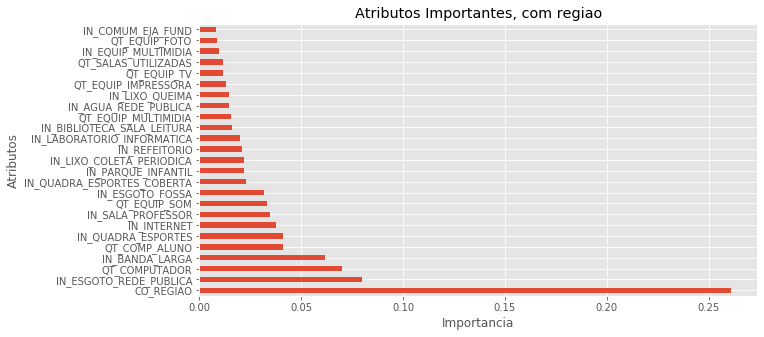

In [0]:
X = base_LP.loc[:, atributos ]
y = base_LP.loc[:,'ROTULO'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

model = RandomForestClassifier(n_estimators=100, max_depth=6)

model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, X.columns)

plt.style.use("ggplot")
plt.figure(figsize=(10,5))

importances.nlargest(25).plot(kind='barh', title="Atributos Importantes, com regiao" )

plt.xlabel('Importancia')
plt.ylabel('Atributos')
plt.show()

## codigo de kim 

In [0]:
df = data.copy()

atributos = ['IN_AGUA_FILTRADA','IN_AGUA_REDE_PUBLICA','IN_AGUA_POCO_ARTESIANO','IN_AGUA_CACIMBA'
,'IN_AGUA_FONTE_RIO','IN_AGUA_INEXISTENTE','IN_ENERGIA_REDE_PUBLICA','IN_ENERGIA_GERADOR'
,'IN_ENERGIA_OUTROS','IN_ENERGIA_INEXISTENTE','IN_ESGOTO_REDE_PUBLICA','IN_ESGOTO_FOSSA'
,'IN_ESGOTO_INEXISTENTE','IN_LIXO_COLETA_PERIODICA','IN_LIXO_QUEIMA'
,'IN_LIXO_JOGA_OUTRA_AREA','IN_LIXO_RECICLA','IN_LIXO_ENTERRA','IN_LIXO_OUTROS'
,'IN_SALA_DIRETORIA','IN_SALA_PROFESSOR','IN_LABORATORIO_INFORMATICA'
,'IN_LABORATORIO_CIENCIAS','IN_SALA_ATENDIMENTO_ESPECIAL','IN_QUADRA_ESPORTES_COBERTA'
,'IN_QUADRA_ESPORTES_DESCOBERTA','IN_QUADRA_ESPORTES','IN_COZINHA','IN_BIBLIOTECA'
,'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA','IN_PARQUE_INFANTIL','IN_BERCARIO'
,'IN_BANHEIRO_FORA_PREDIO'
,'IN_BANHEIRO_DENTRO_PREDIO'
,'IN_BANHEIRO_EI'
,'IN_BANHEIRO_PNE'
,'IN_DEPENDENCIAS_PNE'
,'IN_SECRETARIA'
,'IN_BANHEIRO_CHUVEIRO'
,'IN_REFEITORIO'
,'IN_DESPENSA'
,'IN_ALMOXARIFADO'
,'IN_AUDITORIO'
,'IN_PATIO_COBERTO'
,'IN_PATIO_DESCOBERTO'
,'IN_ALOJAM_ALUNO'
,'IN_ALOJAM_PROFESSOR'
,'IN_AREA_VERDE'
,'IN_LAVANDERIA'
,'IN_DEPENDENCIAS_OUTRAS'
,'QT_SALAS_EXISTENTES'
,'QT_SALAS_UTILIZADAS'
,'IN_EQUIP_TV'
,'IN_EQUIP_VIDEOCASSETE'
,'IN_EQUIP_DVD'
,'IN_EQUIP_PARABOLICA'
,'IN_EQUIP_COPIADORA'
,'IN_EQUIP_RETROPROJETOR'
,'IN_EQUIP_IMPRESSORA'
,'IN_EQUIP_IMPRESSORA_MULT'
,'IN_EQUIP_SOM'
,'IN_EQUIP_MULTIMIDIA'
,'IN_EQUIP_FAX'
,'IN_EQUIP_FOTO'
,'IN_COMPUTADOR'
,'QT_EQUIP_TV'
,'QT_EQUIP_VIDEOCASSETE'
,'QT_EQUIP_DVD'
,'QT_EQUIP_PARABOLICA'
,'QT_EQUIP_COPIADORA'
,'QT_EQUIP_RETROPROJETOR'
,'QT_EQUIP_IMPRESSORA'
,'QT_EQUIP_IMPRESSORA_MULT'
,'QT_EQUIP_SOM'
,'QT_EQUIP_MULTIMIDIA'
,'QT_EQUIP_FAX'
,'QT_EQUIP_FOTO'
,'QT_COMPUTADOR'
,'QT_COMP_ADMINISTRATIVO'
,'QT_COMP_ALUNO'
,'IN_INTERNET'
,'IN_BANDA_LARGA'
,'QT_FUNCIONARIOS'
,'IN_ALIMENTACAO'
,'TP_AEE'
,'TP_ATIVIDADE_COMPLEMENTAR'
,'IN_FUNDAMENTAL_CICLOS'
,'TP_LOCALIZACAO_DIFERENCIADA'
,'IN_MATERIAL_ESP_QUILOMBOLA'
,'IN_MATERIAL_ESP_INDIGENA'
,'IN_MATERIAL_ESP_NAO_UTILIZA'
,'IN_EDUCACAO_INDIGENA'
,'TP_INDIGENA_LINGUA'
,'CO_LINGUA_INDIGENA'
,'IN_BRASIL_ALFABETIZADO'
,'IN_FINAL_SEMANA'
,'IN_FORMACAO_ALTERNANCIA'
,'IN_MEDIACAO_PRESENCIAL'
,'IN_MEDIACAO_SEMIPRESENCIAL'
,'IN_MEDIACAO_EAD'
,'IN_ESPECIAL_EXCLUSIVA'
,'IN_REGULAR'
,'IN_EJA'
,'IN_PROFISSIONALIZANTE'
,'IN_COMUM_CRECHE'
,'IN_COMUM_PRE'
,'IN_COMUM_FUND_AI'
,'IN_COMUM_FUND_AF'
,'IN_COMUM_MEDIO_MEDIO'
,'IN_COMUM_MEDIO_INTEGRADO'
,'IN_COMUM_MEDIO_NORMAL'
,'IN_ESP_EXCLUSIVA_CRECHE'
,'IN_ESP_EXCLUSIVA_PRE'
,'IN_ESP_EXCLUSIVA_FUND_AI'
,'IN_ESP_EXCLUSIVA_FUND_AF'
,'IN_ESP_EXCLUSIVA_MEDIO_MEDIO'
,'IN_ESP_EXCLUSIVA_MEDIO_INTEGR'
,'IN_ESP_EXCLUSIVA_MEDIO_NORMAL'
,'IN_COMUM_EJA_FUND'
,'IN_COMUM_EJA_MEDIO'
,'IN_COMUM_EJA_PROF'
,'IN_ESP_EXCLUSIVA_EJA_FUND'
,'IN_ESP_EXCLUSIVA_EJA_MEDIO'
,'IN_ESP_EXCLUSIVA_EJA_PROF'
,'IN_COMUM_PROF'
,'IN_ESP_EXCLUSIVA_PROF'
,'CO_UF', 'CO_REGIAO', 'TAXA_PARTICIPACAO_5EF']


print(len(atributos))

X = base_LP.loc[:, atributos_ ]
y = base_LP.loc[:,'ROTULO'].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state = 0)


130


In [0]:
start = time.time ()

crossvalidation = KFold(n_splits=5, shuffle=True,
random_state=1)
RF_cls = RandomForestClassifier(random_state=1)
score = np.mean(cross_val_score(RF_cls, X, y,
scoring='accuracy',
cv=crossvalidation))
print('Accuracy: %.3f' % score)

end = time.time ()
print (end-start)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.876
0.8142228126525879


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
scorer = 'accuracy'
start = time.time ()


model = RF_cls
from sklearn.model_selection import GridSearchCV

startGrid = time.time()
max_features = [X.shape[1]//3, 'sqrt', 'log2', 'auto']
min_samples_leaf = [1, 10, 30]
n_estimators = [50, 100, 300]

search_grid = {'n_estimators':n_estimators,'max_features': max_features,'min_samples_leaf': min_samples_leaf}
search_func = GridSearchCV(estimator=RF_cls, param_grid=search_grid, scoring=scorer, cv=crossvalidation, refit = True )

search_func.fit(X,y)

endGrid = time.time()

best_params = search_func.best_params_
best_score = search_func.best_score_

print('Best parameters: %s' % best_params)
print('Best accuracy: %s' % best_score)

end = time.time ()
print (end-start)


Best parameters: {'max_features': 7, 'min_samples_leaf': 10, 'n_estimators': 300}
Best accuracy: 0.8935795954265612
327.059449672699


In [0]:
print('Best accuracy: %s' % (best_score * 100))
print( search_func.best_estimator_)
optimised_random_forest = search_func.best_estimator_
RF_cls.fit(X_Train, Y_Train)# Mostrando importância de cada feature
RF_cls.feature_importances_
importances = pd.Series(RF_cls.feature_importances_, atributos)
importances.nlargest(25).plot(kind='barh')
from sklearn.metrics import classification_report, confusion_matrix
print(cm)
print(classification_report(X,y))

Best accuracy: 89.35795954265612
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

# Graficos de comparacao de acuracia e tempo plots


## funcao plot

In [0]:
def groupPlotBar(data_values, legends, label_groups, x_name="X Axis", y_name="Y Axis", title='', barWidth=0.25):
  import numpy as np
  import matplotlib.pyplot as plt

  num_plot = len( data_values[0] )
  num_bar = len( data_values )

  step = (num_bar+1) * barWidth
  end = step * num_plot
  first_x_bar_loc = np.arange(0, end, step)
  x_bar_locs = [first_x_bar_loc]

  plt.figure(figsize=(10,5))
  plt.style.use("ggplot")

  # Set position of bar on X axis
  for index in range(0, num_bar-1):
    x_bar_locs.append( [x + barWidth for x in x_bar_locs[index]])
  
  # Make the plot
  for index in range(num_bar):
    x_bar_loc = x_bar_locs[index]
    data_value = data_values[index]
    legend = legends[index]

    plt.bar(x_bar_loc, data_value, width=barWidth, edgecolor='white', label=legend)

  plt.xlabel(x_name, fontweight='bold')
  plt.ylabel(y_name, fontweight='bold')
  plt.title(title)
  
  # Add xticks on the middle of the group bars
  if(num_bar%2 != 0):
    plt.xticks([r + (barWidth*2) for r in range(num_plot)], label_groups)
  else:
    pos_label_groups = x_bar_locs[(num_bar//2)]
    plt.xticks([r-(barWidth/2) for r in pos_label_groups ], label_groups)

  plt.legend(loc='lower left')
  path = title.replace(' ', '-')
  plt.savefig(path+'.png')
  #plt.show()

## plots graficos

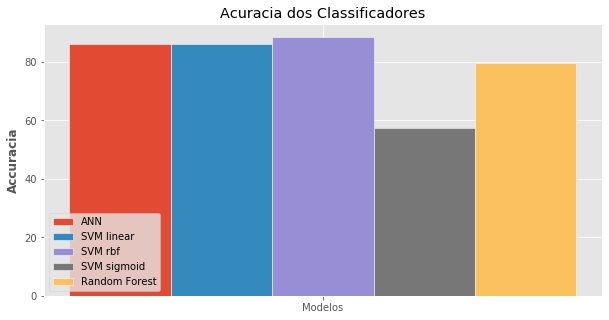

In [0]:
data = ([Ann_acuracia_regiao],[SVM_linear_acuracia],[SVM_rbf_acuracia_regiao],[SVM_sigmoid_acuracia],[rdam_acuracia_regiao])

legends = ["ANN","SVM linear","SVM rbf","SVM sigmoid","Random Forest"]
labels = ["Modelos"]

groupPlotBar(data_values=data, legends=legends, label_groups=labels,y_name='Accuracia', x_name="",  title='Acuracia dos Classificadores')

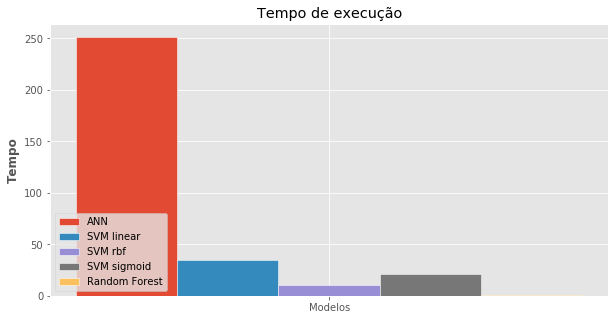

In [0]:
data = ([Ann_tempo_regiao],[SVM_linear_tempo],[SVM_rbf_tempo_regiao],[SVM_sigmoid_tempo],[rdam_tempo_regiao])

legends = ["ANN","SVM linear","SVM rbf","SVM sigmoid","Random Forest"]
labels = ["Modelos"]

groupPlotBar(data_values=data, legends=legends, label_groups=labels,y_name='Tempo', x_name="",  title='Tempo de execução')

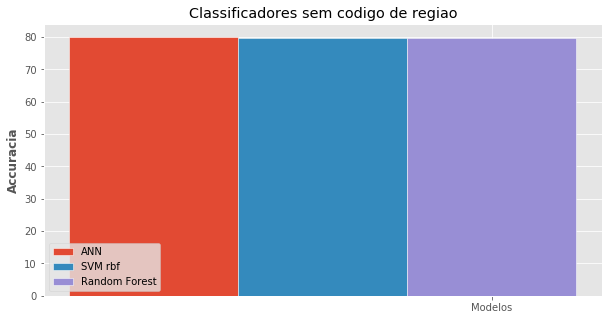

In [0]:
data = ([Ann_acuracia],[SVM_rbf_acuracia],[rdam_acuracia])

legends = ["ANN","SVM rbf","Random Forest"]
labels = ["Modelos"]

groupPlotBar(data_values=data, legends=legends, label_groups=labels,y_name='Accuracia', x_name="",  title='Classificadores sem codigo de regiao')

# New Section

In [0]:
print([Ann_acuracia, Ann_acuracia_regiao,SVM_linear_acuracia, SVM_rbf_acuracia,SVM_rbf_acuracia_regiao,SVM_sigmoid_acuracia,rdam_acuracia,rdam_acuracia_regiao])

[80.00957338670023, 86.07670675593376, 86.08319374651033, 79.78782802903406, 88.51200446677834, 57.523729759910665, 79.70407593523171, 79.46677833612506]


([251.38374638557434], [34.632598638534546], [10.73669719696045], [21.060149908065796], [0.6526961326599121])


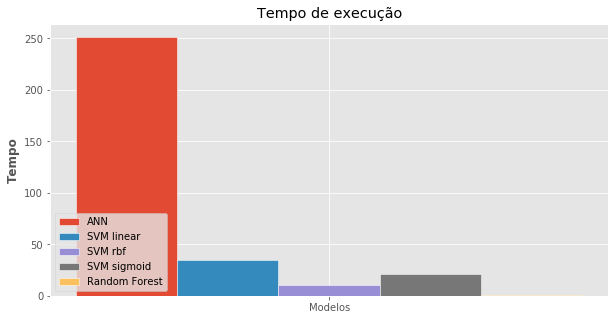

In [90]:
data = ([Ann_tempo_regiao],[SVM_linear_tempo],[SVM_rbf_tempo_regiao],[SVM_sigmoid_tempo],[rdam_tempo_regiao])

legends = ["ANN","SVM linear","SVM rbf","SVM sigmoid","Random Forest"]
labels = ["Modelos"]
print(data)

groupPlotBar(data_values=data, legends=legends, label_groups=labels,y_name='Tempo', x_name="",  title='Tempo de execução')

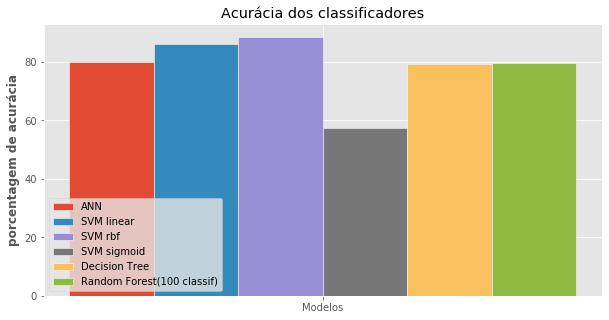

In [91]:
data = ([0.86],[0.86],[0.88],[0.65],[0.80],[0.88])
[80.00957338670023, 86.07670675593376, 86.08319374651033, 79.78782802903406, 88.51200446677834, 57.523729759910665, 79.70407593523171]
[80.00957338670023, 86.07670675593376, 86.08319374651033, 79.78782802903406, 88.51200446677834, 57.523729759910665, 79.70407593523171, 79.46677833612506]
#print([Ann_acuracia, Ann_acuracia_regiao,SVM_linear_acuracia, SVM_rbf_acuracia,SVM_rbf_acuracia_regiao,SVM_sigmoid_acuracia,rdam_acuracia,rdam_acuracia_regiao])

legendaSemRegiao= ["ANN","SVM linear","SVM rbf","SVM sigmoid","TreeDecision","Random Forest"]
valoresSemRegiao= [80.00957338670023,86.08319374651033]
legends = ["ANN sem região","Ann com região","SVM linear","SVM rbf","SVM sigmoid", "TreeDecision","Random Forest(100 classif)"]
labels = ["Modelos"]
legendaComRegiao = ["ANN","SVM linear","SVM rbf","SVM sigmoid", "Decision Tree","Random Forest(100 classif)"]
valoresComRegiao = ([80.00957338670023],[86.08319374651033],[88.51200446677834],[57.523729759910665],[79.1],[79.46677833612506])

#groupPlotBar(data_values=data, legends=legends, label_groups=labels,y_name='Macro AVG', x_name="",  title='Imagens coloridas')
groupPlotBar(data_values=valoresComRegiao, legends=legendaComRegiao, label_groups=labels,y_name='porcentagem de acurácia', x_name="",  title='Acurácia dos classificadores')

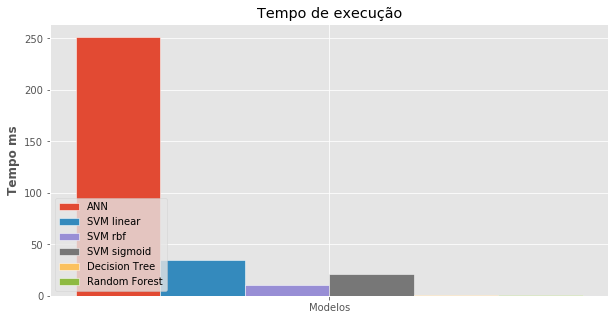

In [92]:
data = ([251.38374638557434], [34.632598638534546], [10.73669719696045], [21.060149908065796],[0.5511016845703125], [0.6526961326599121])

#data = ([Ann_tempo_regiao],[SVM_linear_tempo],[SVM_rbf_tempo_regiao],[SVM_sigmoid_tempo],[treedecision],[rdam_tempo_regiao])

legends = ["ANN","SVM linear","SVM rbf","SVM sigmoid","Decision Tree","Random Forest"]
labels = ["Modelos"]

groupPlotBar(data_values=data, legends=legends, label_groups=labels,y_name='Tempo ms', x_name="",  title='Tempo de execução')



> Indented block

